In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import sys
sys.path.append('..')

import modules.plotting as pl
import modules.phase_detection as pde
import modules.linear_algebra as lin
import modules.sliding_window as sw
import modules.numpy_funcs as nf
import modules.iterable_funcs as itf

In [6]:
step_signal = np.array([-132.92464013, -140.81907051, -134.09734723, -137.30070621,
       -136.75724097, -135.0953571 , -136.41148653, -138.85673297,
       -116.79830848, -104.89000987,  -86.19596402,  -82.68204904,
        -78.07282679,  -75.26586272,  -71.92137252,  -69.40936384,
        -71.92481684,  -71.58625044,  -68.84399353,  -73.74994235,
        -66.85535912,  -58.7102328 ,  -68.62970421,  -68.29195937,
        -70.88018795,  -68.39564947,  -67.23065307,  -61.49008977,
        -58.57539484,  -50.68461821,  -39.85339695,  -26.01398098,
        -11.62614386,    2.96744593,   29.50129414,   36.0240753 ,
         46.56475693,   43.52066437,   49.59089223,   47.52112268,
         47.25060427,   48.29875558,   46.18449514,   27.00217748,
         41.60572252,   56.46469908,   51.27876665,   47.33354167,
         50.33113558,   47.73924855,   49.58679791,   51.36999962,
         54.37069622,   57.37986703,   60.83464521,   76.06940047,
        105.11464991,  103.85739612,  103.05068731])

In [7]:
pad_width = 5
cluster_values = sw.apply_to_padded(step_signal, np.var, pad_width,
                                    'reflect', reflect_type='odd')

cluster_array = nf.to_column(cluster_values)

k_means = KMeans(n_clusters=2, random_state=0).fit(cluster_array)

stance_label = np.argmin(k_means.cluster_centers_)
is_stance = k_means.labels_ == stance_label

In [8]:
# Remove small groups of consecutive stance frames, because these could
# be false positives.
is_stance = nf.filter_consecutive_true(is_stance, min_length=10)

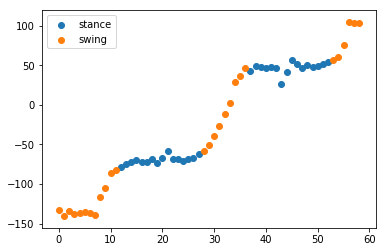

In [9]:
indices = [i for i, _ in enumerate(step_signal)]
points = np.column_stack((indices, step_signal))

pl.scatter_labels(points, ~is_stance)

plt.legend(['stance', 'swing'])